In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

from seaborn import countplot
from matplotlib.pyplot import figure, show

from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.models import FactorRange
from bokeh.server.server import Server
from bokeh.application import Application
from bokeh.application.handlers.function import FunctionHandler

from bokeh.models.widgets import Panel, Tabs
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.models.widgets import CheckboxGroup
from bokeh.layouts import column, row, WidgetBox

host = "mysql.nm-interactive.net"
port = 3306
user = "windesheim"
password = "pMjq357Kdee7Sx8C"
database = "windesheim"
client = "mysql"

#Installeer eerst Mysqlcient in Anaconda Navigator
engine = create_engine("{0}://{1}:{2}@{3}:{4}/{5}".format(client, user, password, host, port, database))

datasource = pd.read_sql_query("SELECT * FROM source WHERE KWALIFICATIENIVEAU = 4",engine)
wervingsgebieden = pd.read_sql_query("SELECT * FROM wervingsgebieden",engine)
datasource.info()
wervingsgebieden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169415 entries, 0 to 169414
Data columns (total 14 columns):
nr                    169415 non-null int64
PC4_LEERL             169415 non-null int64
KWALIFICATIENIVEAU    169415 non-null int64
KWALIFICATIE CODE     169415 non-null int64
KWALIFICATIE NAAM     169415 non-null object
MBO SECTOR            169415 non-null object
DOMEIN                169415 non-null object
SECTORUNIT SBB        169415 non-null object
GESLACHT              169415 non-null object
2013   AANT           169415 non-null int64
2014   AANT           169415 non-null int64
2015   AANT           169415 non-null int64
2016   AANT           169415 non-null int64
2017   AANT           169415 non-null int64
dtypes: int64(9), object(5)
memory usage: 18.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 6 columns):
index            44 non-null int64
PostcodeStart    44 non-null int64
PostcodeEind     44 non-null int64
Gemeente  

In [2]:
datasource

,nr,PC4_LEERL,KWALIFICATIENIVEAU,KWALIFICATIE CODE,KWALIFICATIE NAAM,MBO SECTOR,DOMEIN,SECTORUNIT SBB,GESLACHT,2013 AANT,2014 AANT,2015 AANT,2016 AANT,2017 AANT
0,1424,1011,4,10388,Horeca-ondernemer/-manager,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",M,1,0,0,0,0
1,1425,1011,4,10801,Restauratiemedewerker,techniek,Bouw en infra,Sectorunit techniek en gebouwde omgeving,M,1,0,0,0,0
2,1426,1011,4,90038,Artiest (Muziek),techniek,Zorg en welzijn,Sectorunit creatieve industrie en ICT,M,0,0,0,2,0
3,1427,1011,4,90290,Ondernemer detailhandel,economie,Handel en ondernemerschap,Sectorunit handel,M,1,0,0,0,0
4,1428,1011,4,90301,Ondernemer horeca/bakkerij (Manager/ondernemer...,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",M,0,1,0,0,0
5,1429,1011,4,90301,Ondernemer horeca/bakkerij (Manager/ondernemer...,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",V,0,1,0,0,0
6,1430,1011,4,90303,Ondernemer horeca/bakkerij (Manager/ondernemer...,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",M,0,0,1,0,0
7,1431,1011,4,90303,Ondernemer horeca/bakkerij (Manager/ondernemer...,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",V,1,0,0,0,0
8,1432,1011,4,90411,Mediavormgever (Animatie/audiovisuele vormgeving),techniek,Media en vormgeving,Sectorunit creatieve industrie en ICT,M,0,1,0,0,0
9,1433,1011,4,90412,Mediavormgever (Art & Design KC GOC),techniek,Media en vormgeving,Sectorunit creatieve industrie en ICT,V,1,0,0,0,0


In [3]:
wervingsgebieden

,index,PostcodeStart,PostcodeEind,Gemeente,Locatie,Categorie
0,0,7940,7999,Meppel,Zwolle,Thuismarkt
1,1,8000,8069,Zwolle,Zwolle,Thuismarkt
2,2,8070,8099,Nunspeet,Zwolle,Thuismarkt
3,3,8100,8159,Raalte,Zwolle,Thuismarkt
4,4,8160,8199,Epe,Zwolle,Thuismarkt
5,5,8250,8299,Kampen,Zwolle,Thuismarkt
6,6,8300,8329,Emmeloord,Zwolle,Thuismarkt
7,7,8330,8399,Steenwijk,Zwolle,Thuismarkt
8,8,3770,3799,Barneveld,Zwolle,Aangrenzend Primair
9,9,3840,3859,Harderwijk,Zwolle,Aangrenzend Primair


In [4]:
datasource.dtypes

nr                     int64
PC4_LEERL              int64
KWALIFICATIENIVEAU     int64
KWALIFICATIE CODE      int64
KWALIFICATIE NAAM     object
MBO SECTOR            object
DOMEIN                object
SECTORUNIT SBB        object
GESLACHT              object
2013   AANT            int64
2014   AANT            int64
2015   AANT            int64
2016   AANT            int64
2017   AANT            int64
dtype: object

In [5]:
wervingsgebieden.dtypes

index             int64
PostcodeStart     int64
PostcodeEind      int64
Gemeente         object
Locatie          object
Categorie        object
dtype: object

In [6]:
# Functie voor het checken van de locatie
def check_locatie(PostCode):
    test = wervingsgebieden.loc[(wervingsgebieden.PostcodeStart <= PostCode) & (wervingsgebieden.PostcodeEind >= PostCode), ['Locatie']]

    if test.empty:
        return ''
    else:
        return test['Locatie'].iloc[0]
# copy-paste voor de categorie
def check_categorie(PostCode):
    test = wervingsgebieden.loc[(wervingsgebieden.PostcodeStart <= PostCode) & (wervingsgebieden.PostcodeEind >= PostCode), ['Categorie']]

    if test.empty:
        return ''
    elif test.Categorie.count() > 1:
        return 'Meerdere'
    else:
        return test['Categorie'].iloc[0]

#voeg kolommen toe aan datasource    
datasource["Locatie"] = datasource["PC4_LEERL"].apply(check_locatie)
datasource["Categorie"] = datasource["PC4_LEERL"].apply(check_categorie)

In [7]:
#import time

#def vindLocatie (leerlingen, postcodes):
#    toReturn = []
#    for leerling in leerlingen:
#        detected = []
#        for postcode in postcodes:
#            postcodeleerling = leerling[0]
#            if leerling[1] == 4 and postcodeleerling >= postcode[0] and postcodeleerling <= postcode[1]:
#                detected.append(postcode[2])
#        toReturn.append(detected)
#    return toReturn

#def vindCategorie (leerlingen, postcodes):
#    toReturn = []
#    for leerling in leerlingen:
#        detected = []
#        for postcode in postcodes:
#            postcodeleerling = leerling[0]
#            if leerling[1] == 4 and postcodeleerling >= postcode[0] and postcodeleerling <= postcode[1]:
#                detected.append(postcode[2])
#        toReturn.append(detected)
#    return toReturn
    
#start = time.time()

#subset dataframes
#opleidingList = datasource[['PC4_LEERL', 'KWALIFICATIENIVEAU']].values
#locatieList = wervingsgebieden[['PostcodeStart','PostcodeEind','Locatie']].values
#categorieList = wervingsgebieden[['PostcodeStart','PostcodeEind','Categorie']].values

#add queries data to datasource
#datasource["Locatie"] = vindLocatie(opleidingList, locatieList)
#datasource["Categorie"] = vindCategorie(opleidingList, categorieList)
#print (time.time() - start)

In [8]:
#Welke soorten zitten er in Locatie?
datasource.Locatie.unique()

#Welke soorten zitten in Categorie?
datasource.Categorie.unique()

array(['Aangrenzend Primair', '', 'Thuismarkt', 'Meerdere',
       'Aangrenzend Secundair'], dtype=object)

In [9]:
datasource

,nr,PC4_LEERL,KWALIFICATIENIVEAU,KWALIFICATIE CODE,KWALIFICATIE NAAM,MBO SECTOR,DOMEIN,SECTORUNIT SBB,GESLACHT,2013 AANT,2014 AANT,2015 AANT,2016 AANT,2017 AANT,Locatie,Categorie
0,1424,1011,4,10388,Horeca-ondernemer/-manager,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",M,1,0,0,0,0,Flevoland,Aangrenzend Primair
1,1425,1011,4,10801,Restauratiemedewerker,techniek,Bouw en infra,Sectorunit techniek en gebouwde omgeving,M,1,0,0,0,0,Flevoland,Aangrenzend Primair
2,1426,1011,4,90038,Artiest (Muziek),techniek,Zorg en welzijn,Sectorunit creatieve industrie en ICT,M,0,0,0,2,0,Flevoland,Aangrenzend Primair
3,1427,1011,4,90290,Ondernemer detailhandel,economie,Handel en ondernemerschap,Sectorunit handel,M,1,0,0,0,0,Flevoland,Aangrenzend Primair
4,1428,1011,4,90301,Ondernemer horeca/bakkerij (Manager/ondernemer...,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",M,0,1,0,0,0,Flevoland,Aangrenzend Primair
5,1429,1011,4,90301,Ondernemer horeca/bakkerij (Manager/ondernemer...,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",V,0,1,0,0,0,Flevoland,Aangrenzend Primair
6,1430,1011,4,90303,Ondernemer horeca/bakkerij (Manager/ondernemer...,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",M,0,0,1,0,0,Flevoland,Aangrenzend Primair
7,1431,1011,4,90303,Ondernemer horeca/bakkerij (Manager/ondernemer...,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",V,1,0,0,0,0,Flevoland,Aangrenzend Primair
8,1432,1011,4,90411,Mediavormgever (Animatie/audiovisuele vormgeving),techniek,Media en vormgeving,Sectorunit creatieve industrie en ICT,M,0,1,0,0,0,Flevoland,Aangrenzend Primair
9,1433,1011,4,90412,Mediavormgever (Art & Design KC GOC),techniek,Media en vormgeving,Sectorunit creatieve industrie en ICT,V,1,0,0,0,0,Flevoland,Aangrenzend Primair


# 1. Visualisatie op 'Sectorunit SBB'
De aanvliegroute is om per visualisatie een apart dataframe te maken. Sorteren op attribuurtwaarde lijkt me handig.

### 1a. Dataframe verkennen: Sorteren op unieke attribuutwaarde
Normaal gesproken staan alle data in willekeurige volgorde. Je zou kunnen sorteren attribuurtwaarde, bijvoorbeeld binnen de kolom 'SECTORUNIT SBB'.<br>
<font color=grey>
Syntax: df.sort_values(by=['col1']) , of<br>
df.sort_values(by=['col1', 'col2']) <br>
Wil je eea omgekeerd selecteren? Dan df.sort_values(by='col1', ascending=False)</font>
<font color=grey>Bron:https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html</font> <br>

N.B. Simon en Danny zijn nog bezig met 'Locatie' en 'Categorie'. Dit zijn nu arrays [] binnen de Dataframe. Ze zoeken nog naar een manier om dit om te typeren naar normale datavelden, zodat we ook hier aparte Dataframes (locatie, categorie) van kunnen maken die gevisualiseerd kunnen worden.



In [10]:
df = datasource
df.sort_values(by='SECTORUNIT SBB')

,nr,PC4_LEERL,KWALIFICATIENIVEAU,KWALIFICATIE CODE,KWALIFICATIE NAAM,MBO SECTOR,DOMEIN,SECTORUNIT SBB,GESLACHT,2013 AANT,2014 AANT,2015 AANT,2016 AANT,2017 AANT,Locatie,Categorie
80546,190386,4796,4,94291,Installeren (Leidinggevend monteur elektrotech...,techniek,Techniek en procesindustrie,Bovensectoraal,M,0,0,1,0,0,,
78413,184988,4651,4,93384,Werkplaatsmanagement Mobiliteitsbranche (Werkp...,techniek,Mobiliteit en voertuigen,Bovensectoraal,M,0,1,0,0,0,,
99502,233069,5632,4,94291,Installeren (Leidinggevend monteur elektrotech...,techniek,Techniek en procesindustrie,Bovensectoraal,M,1,0,0,0,0,,
167789,394262,9804,4,93384,Werkplaatsmanagement Mobiliteitsbranche (Werkp...,techniek,Mobiliteit en voertuigen,Bovensectoraal,M,0,0,1,0,0,,
78414,184989,4651,4,93386,Werkplaatsmanagement Mobiliteitsbranche (Werkp...,techniek,Mobiliteit en voertuigen,Bovensectoraal,M,1,0,0,0,0,,
78415,184990,4651,4,93386,Werkplaatsmanagement Mobiliteitsbranche (Werkp...,techniek,Mobiliteit en voertuigen,Bovensectoraal,V,1,0,0,0,0,,
82324,194267,4854,4,25160,Leidinggevende team/afdeling/project,economie,Handel en ondernemerschap,Bovensectoraal,M,0,0,0,0,1,,
71264,166976,4116,4,93384,Werkplaatsmanagement Mobiliteitsbranche (Werkp...,techniek,Mobiliteit en voertuigen,Bovensectoraal,M,0,1,0,0,0,,
65545,153627,3825,4,93386,Werkplaatsmanagement Mobiliteitsbranche (Werkp...,techniek,Mobiliteit en voertuigen,Bovensectoraal,M,1,0,0,0,0,Flevoland,Aangrenzend Primair
110916,260083,6191,4,94291,Installeren (Leidinggevend monteur elektrotech...,techniek,Techniek en procesindustrie,Bovensectoraal,M,0,1,0,0,0,,


### 1b. SNELLER: Welke unieke attribuutwaarden in een kolom
Het is sneller om de unieke attribuutwaarden uit te vragen. Dan is het later makkelijker om te selecteren / slicen / visualiseren op een bepaalde attribuutwaarde in een kolom.

Bron:https://chrisalbon.com/python/data_wrangling/pandas_list_unique_values_in_column/ 

In [11]:
df['SECTORUNIT SBB'].unique()

array(['Sectorunit voedsel, groen en gastvrijheid',
       'Sectorunit techniek en gebouwde omgeving',
       'Sectorunit creatieve industrie en ICT', 'Sectorunit handel',
       'Sectorunit zakelijke dienstverlening en veiligheid',
       'Sectorunit zorg, welzijn en sport',
       'Sectorunit mobiliteit, transport, logistiek, maritiem',
       'Sectorunit specialistisch vakmanschap', 'Bovensectoraal'],
      dtype=object)

# 2. Totalen per unieke attribuutwaarde
Om de unieke attribuutwaarden te visualiseren, hebben we de totalen nodig. Schijnbaar kan dat ook makkelijk, na lang zoeken, gvd. <br>

<font color=grey>Syntax: df.groupby(['kolomnaam' waarvan je totalen wil]).sum()[['kolom aant1','kolom aant1', 'enzovoorts']]</font> <br>
Bron: https://stackoverflow.com/questions/35307732/how-to-sum-in-pandas-by-unique-index-in-several-columns

In [12]:
df_totaalSBB = df.groupby(['SECTORUNIT SBB']).sum()[['2013   AANT','2014   AANT','2015   AANT','2016   AANT','2017   AANT']]
df_totaalSBB.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Bovensectoraal to Sectorunit zorg, welzijn en sport
Data columns (total 5 columns):
2013   AANT    9 non-null int64
2014   AANT    9 non-null int64
2015   AANT    9 non-null int64
2016   AANT    9 non-null int64
2017   AANT    9 non-null int64
dtypes: int64(5)
memory usage: 432.0+ bytes


In [13]:
df_totaalSBB.head(10)

,2013 AANT,2014 AANT,2015 AANT,2016 AANT,2017 AANT
SECTORUNIT SBB,,,,,
Bovensectoraal,369,517,433,306,562
Sectorunit creatieve industrie en ICT,6856,7066,7667,8033,9663
Sectorunit handel,5792,6105,6009,6134,6248
"Sectorunit mobiliteit, transport, logistiek, maritiem",2383,2472,2677,2765,3027
Sectorunit specialistisch vakmanschap,463,573,568,596,649
Sectorunit techniek en gebouwde omgeving,6523,6176,6270,6310,6517
"Sectorunit voedsel, groen en gastvrijheid",6892,7078,7720,7851,10070
Sectorunit zakelijke dienstverlening en veiligheid,9769,10178,10071,9482,9214
"Sectorunit zorg, welzijn en sport",22036,22116,22298,20812,21885


# 3. Visualiseren totalen 'Sectorunit SBB'

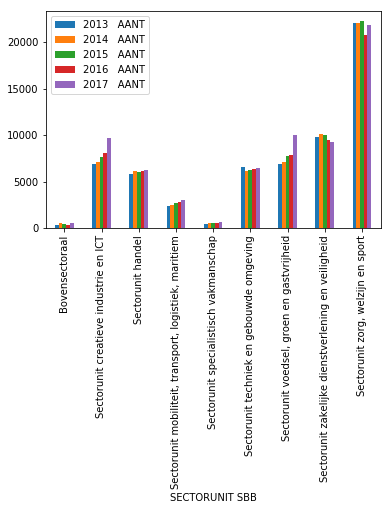

In [14]:
%config IPCompleter.greedy = True  
%matplotlib inline
df_totaalSBB.plot.bar()

Bron voor onderstaande: https://hub.mybinder.org/user/bokeh-bokeh-notebooks-yecjmjgh/notebooks/tutorial/07%20-%20Bar%20and%20Categorical%20Data%20Plots.ipynb

# 4. Visualiseer hoe vaak een bepaald type mbo niveau 4 gediplomeerden voorkomt in het wervingsgebied van de Windesheim locatie Zwolle in absolute aantallen

In [15]:
#dataframe om alle gediplomeerden in regio Zwolle te selecteren
df_locatie_zwolle = df.loc[df['Locatie'] == 'Zwolle']
df_aantal_zwolle = df_locatie_zwolle.groupby(['Locatie']).sum()[['2013   AANT','2014   AANT','2015   AANT','2016   AANT','2017   AANT']]

In [16]:
df_aantal_zwolle.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Zwolle to Zwolle
Data columns (total 5 columns):
2013   AANT    1 non-null int64
2014   AANT    1 non-null int64
2015   AANT    1 non-null int64
2016   AANT    1 non-null int64
2017   AANT    1 non-null int64
dtypes: int64(5)
memory usage: 48.0+ bytes


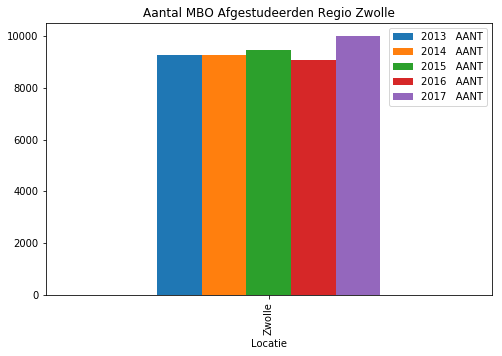

In [17]:
df_aantal_zwolle.plot.bar(figsize=(8,5.0),title='Aantal MBO Afgestudeerden Regio Zwolle')

In [18]:
df_locatie_zwolle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24228 entries, 63982 to 162220
Data columns (total 16 columns):
nr                    24228 non-null int64
PC4_LEERL             24228 non-null int64
KWALIFICATIENIVEAU    24228 non-null int64
KWALIFICATIE CODE     24228 non-null int64
KWALIFICATIE NAAM     24228 non-null object
MBO SECTOR            24228 non-null object
DOMEIN                24228 non-null object
SECTORUNIT SBB        24228 non-null object
GESLACHT              24228 non-null object
2013   AANT           24228 non-null int64
2014   AANT           24228 non-null int64
2015   AANT           24228 non-null int64
2016   AANT           24228 non-null int64
2017   AANT           24228 non-null int64
Locatie               24228 non-null object
Categorie             24228 non-null object
dtypes: int64(9), object(7)
memory usage: 3.1+ MB


# 4.1 Toevoeging visualisatie - kwalificatie landelijk

Visualiseer de meest behaalde MBO 4 diploma's (kwalificatie naam) landelijk.

In [19]:
# Zorg ervoor dat de kwalificatie naam uniek wordt weergegeven
df['KWALIFICATIE NAAM'].unique()

array(['Horeca-ondernemer/-manager', 'Restauratiemedewerker',
       'Artiest (Muziek)', 'Ondernemer detailhandel',
       'Ondernemer horeca/bakkerij (Manager/ondernemer caf?-bar)',
       'Ondernemer horeca/bakkerij (Manager/ondernemer horeca)',
       'Mediavormgever (Animatie/audiovisuele vormgeving)',
       'Mediavormgever (Art & Design KC GOC)',
       'Mediavormgever (Grafische vormgeving)',
       'Mediavormgever (Interactieve vormgeving)',
       'Medewerker marketing en communicatie (Assistent communicatiemedewerker)',
       'Medewerker marketing en communicatie (Marketing medewerker)',
       'Medewerker marketing en communicatie (Medewerker evenementenorganisatie)',
       'Assistent-manager internationale handel (Assistent-manager internationale handel buitendienst)',
       'Interieuradviseur', 'Apothekersassistent', 'Doktersassistent',
       'Sociaal-cultureel werker',
       'Sport en bewegen (Sport- en bewegingsco?rdinator / Bewegingsagoog)',
       'Tandartsassiste

In [20]:
# Creeer dataframe met daarin het aantal behaalde diploma's per kwalificatie
df_totaalKN = df.groupby(['KWALIFICATIE NAAM']).sum()[['2013   AANT','2014   AANT','2015   AANT','2016   AANT','2017   AANT']]
df_totaalKN.head()

,2013 AANT,2014 AANT,2015 AANT,2016 AANT,2017 AANT
KWALIFICATIE NAAM,,,,,
(Junior) accountmanager,0,0,0,0,3
AV-productie,17,0,0,0,0
AV-productie (Beeldtechnicus),16,10,3,1,0
AV-productie (Cameraman),129,144,143,17,1
AV-productie (Fotograaf),196,172,199,164,192


In [21]:
# Top 10 meest behaalde diploma's jaar 2017 - Landelijk

df_landelijk = df.groupby(['KWALIFICATIE NAAM','MBO SECTOR']).sum()[['2013   AANT','2014   AANT','2015   AANT','2016   AANT','2017   AANT']]
df_landelijk = df_landelijk.sort_values(by='2017   AANT', ascending=False)
# Laat de (10) meest voorkomende diploma's van 2017 zien
df_landelijk10 = df_landelijk.nlargest(10, '2017   AANT')
df_landelijk10

,,2013 AANT,2014 AANT,2015 AANT,2016 AANT,2017 AANT
KWALIFICATIE NAAM,MBO SECTOR,,,,,
Mbo-Verpleegkundige,zorg en welzijn,205,1011,2644,4191,5064
Onderwijsassistent,zorg en welzijn,3205,3096,2660,2604,2647
Maatschappelijke Zorg (Persoonlijk begeleider specifieke doelgroepen),zorg en welzijn,1418,1636,2078,2068,2412
Financi?le beroepen (Bedrijfsadministrateur),economie,2071,2371,2451,2393,2304
Manager handel (Filiaalmanager),economie,1917,2174,2067,2020,2220
Middenkader engineering (Technicus),techniek,1841,1929,1933,2018,2035
Maatschappelijke Zorg (Persoonlijk begeleider gehandicaptenzorg),zorg en welzijn,2288,2320,2419,1925,1833
ICT- en mediabeheer (ICT-beheerder),economie,327,502,989,1312,1830
Gespecialiseerd Pedagogisch medewerker 4 kinderopvang,zorg en welzijn,2473,2415,2215,1705,1751


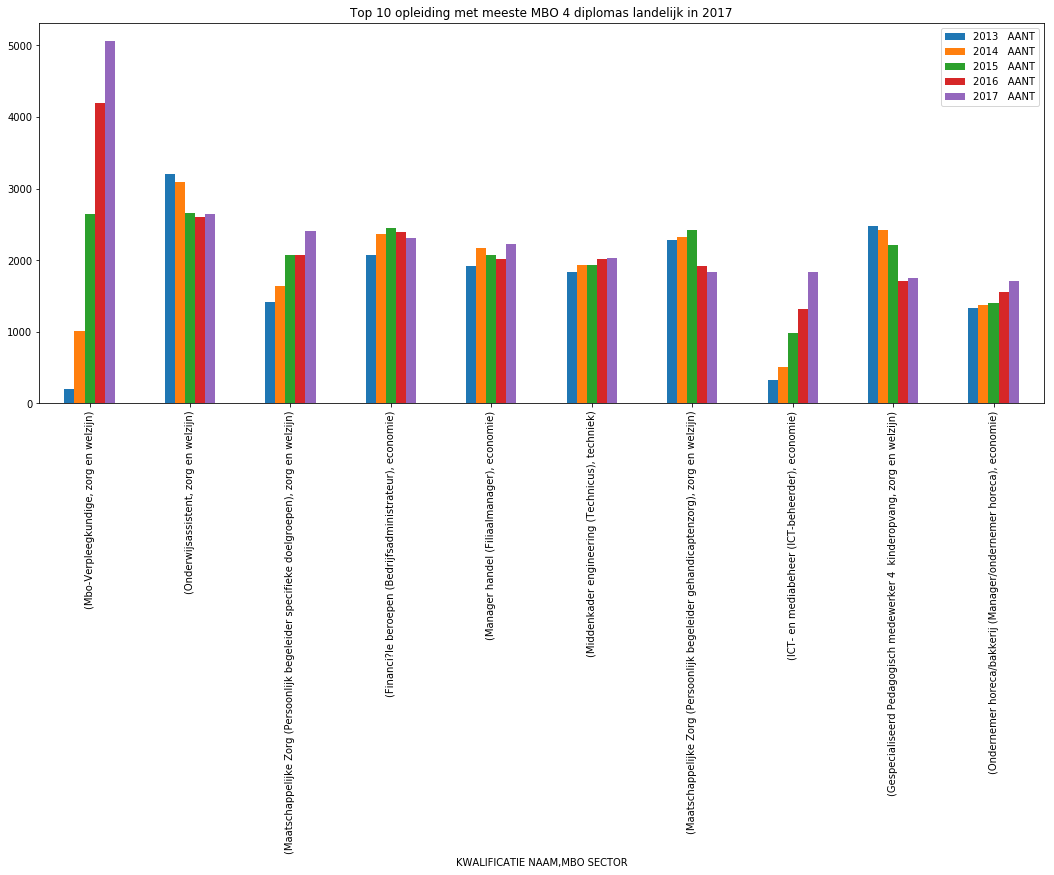

In [22]:
df_landelijk10.plot.bar(figsize=(18,7.0),title='Top 10 opleiding met meeste MBO 4 diplomas landelijk in 2017')

# 4.2 Toevoeging visualisatie - kwalificatie wervingsgebied Zwolle

Visualiseer de meest behaalde MBO 4 diploma's (kwalificatie naam) binnen het wervingsgebied Zwolle.

In [23]:
# Top 10 meest behaalde diploma's jaar 2017 - Wervingsgebied Zwolle

df_zwolle = df
df_zwolle = df_zwolle.loc[df_zwolle['Locatie'] == 'Zwolle']
df_zwolle = df_zwolle.groupby(['KWALIFICATIE NAAM','MBO SECTOR']).sum()[['2013   AANT','2014   AANT','2015   AANT','2016   AANT','2017   AANT']]
df_zwolle = df_zwolle.sort_values(by='2017   AANT', ascending=False)
# Laat de (10) meest voorkomende diploma's zien van 2017
df_zwolle10 = df_zwolle.nlargest(10, '2017   AANT')
df_zwolle10

# Opleiding Mbo-Verpleegkundige lijkt enorm gegroeid te zijn, maar werd eerder als MBO-verpleegkundige omschreven.

,,2013 AANT,2014 AANT,2015 AANT,2016 AANT,2017 AANT
KWALIFICATIE NAAM,MBO SECTOR,,,,,
Mbo-Verpleegkundige,zorg en welzijn,81,240,594,804,935
Maatschappelijke Zorg (Persoonlijk begeleider specifieke doelgroepen),zorg en welzijn,261,298,414,363,454
Onderwijsassistent,zorg en welzijn,553,496,444,436,445
Maatschappelijke Zorg (Persoonlijk begeleider gehandicaptenzorg),zorg en welzijn,485,458,492,414,369
Manager handel (Filiaalmanager),economie,338,325,331,313,359
Middenkader engineering (Technicus),techniek,292,293,326,312,330
Financi?le beroepen (Bedrijfsadministrateur),economie,323,306,319,348,301
Gespecialiseerd Pedagogisch medewerker 4 kinderopvang,zorg en welzijn,358,307,278,256,285
Secretariele beroepen (Directiesecretaresse/managementassistent),economie,114,212,228,262,242


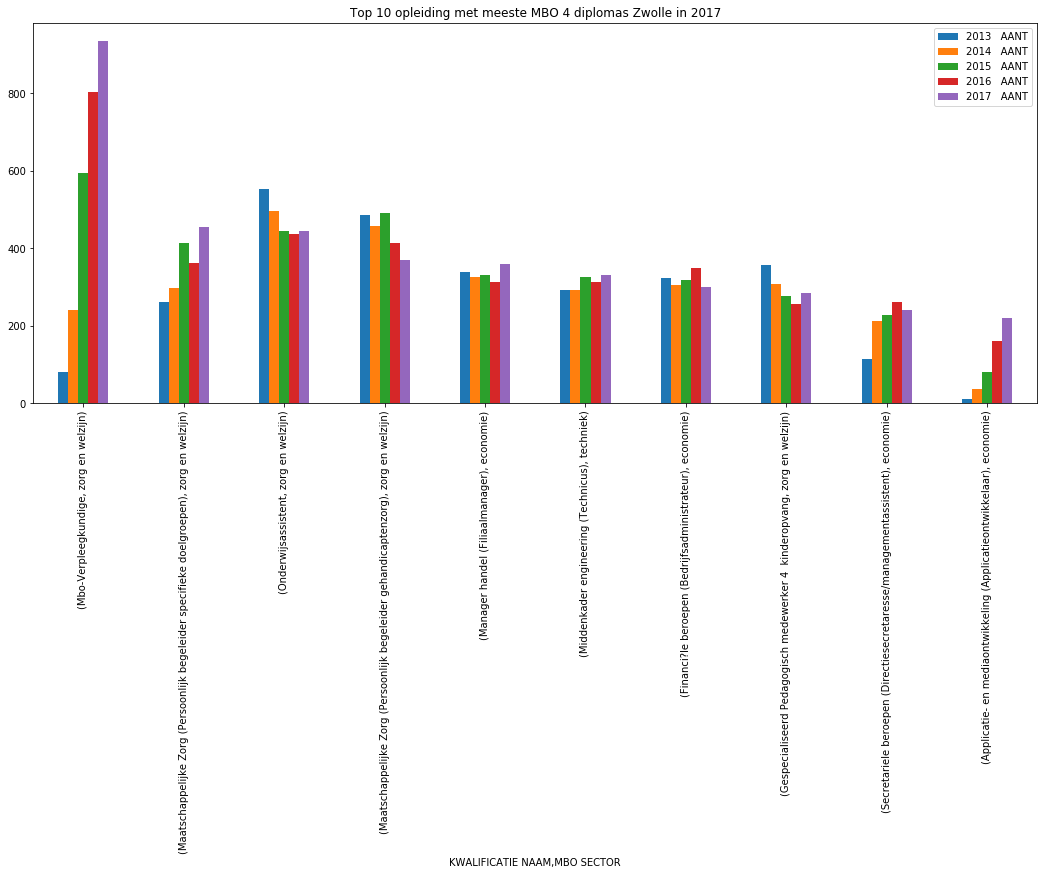

In [24]:
df_zwolle10.plot.bar(figsize=(18,7.0),title='Top 10 opleiding met meeste MBO 4 diplomas Zwolle in 2017')

# 5. Visualiseer hoe vaak een bepaald type mbo niveau 4 gediplomeerden voorkomt in het wervingsgebied van de Windesheim locatie Flevoland in absolute aantallen

In [25]:
#dataframe om alle gediplomeerden in regio Flevoland te selecteren
df_locatie_flevoland = df.loc[df['Locatie'] == 'Flevoland']
df_aantal_flevoland = df_locatie_flevoland.groupby(['Locatie']).sum()[['2013   AANT','2014   AANT','2015   AANT','2016   AANT','2017   AANT']]

In [26]:
df_aantal_flevoland

,2013 AANT,2014 AANT,2015 AANT,2016 AANT,2017 AANT
Locatie,,,,,
Flevoland,6713,7032,6556,6631,6821


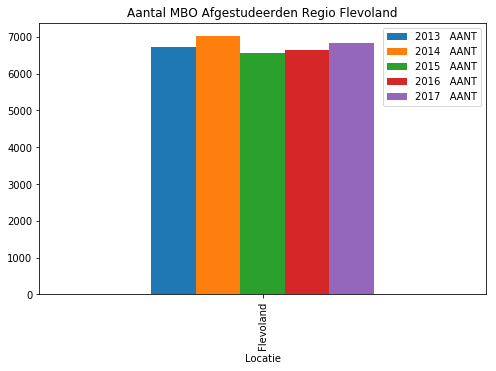

In [27]:
df_aantal_flevoland.plot.bar(figsize=(8,5.0),title='Aantal MBO Afgestudeerden Regio Flevoland')

# 5.1 Toevoeging visualisatie - kwalificatie wervingsgebied Flevoland

Visualiseer de meest behaalde MBO 4 diploma's (kwalificatie naam) binnen het wervingsgebied Flevoland.

In [28]:
# Top 10 meest behaalde diploma's jaar 2017 - Wervingsgebied Flevoland

df_flevoland = df
df_flevoland = df_flevoland.loc[df_flevoland['Locatie'] == 'Flevoland']
df_flevoland = df_flevoland.groupby(['KWALIFICATIE NAAM','MBO SECTOR']).sum()[['2013   AANT','2014   AANT','2015   AANT','2016   AANT','2017   AANT']]
df_flevoland = df_flevoland.sort_values(by='2017   AANT', ascending=False)
# Laat de (10) meest voorkomende diploma's van 2017 zien
df_flevoland10 = df_flevoland.nlargest(10, '2017   AANT')
df_flevoland10

# Opleiding Mbo-Verpleegkundige lijkt enorm gegroeid te zijn, maar werd eerder als MBO-verpleegkundige omschreven.

,,2013 AANT,2014 AANT,2015 AANT,2016 AANT,2017 AANT
KWALIFICATIE NAAM,MBO SECTOR,,,,,
Mbo-Verpleegkundige,zorg en welzijn,36,133,227,304,350
Financi?le beroepen (Bedrijfsadministrateur),economie,313,421,317,313,310
Juridisch medewerker zakelijke dienstverlening,economie,284,304,295,279,305
Manager handel (Filiaalmanager),economie,237,247,237,303,300
Ondernemer horeca/bakkerij (Manager/ondernemer horeca),economie,198,194,204,234,252
ICT- en mediabeheer (ICT-beheerder),economie,56,106,128,172,229
Medewerker marketing en communicatie (Marketing medewerker),economie,308,319,318,298,219
Onderwijsassistent,zorg en welzijn,274,265,283,203,218
Gespecialiseerd Pedagogisch medewerker 4 kinderopvang,zorg en welzijn,354,367,265,225,200


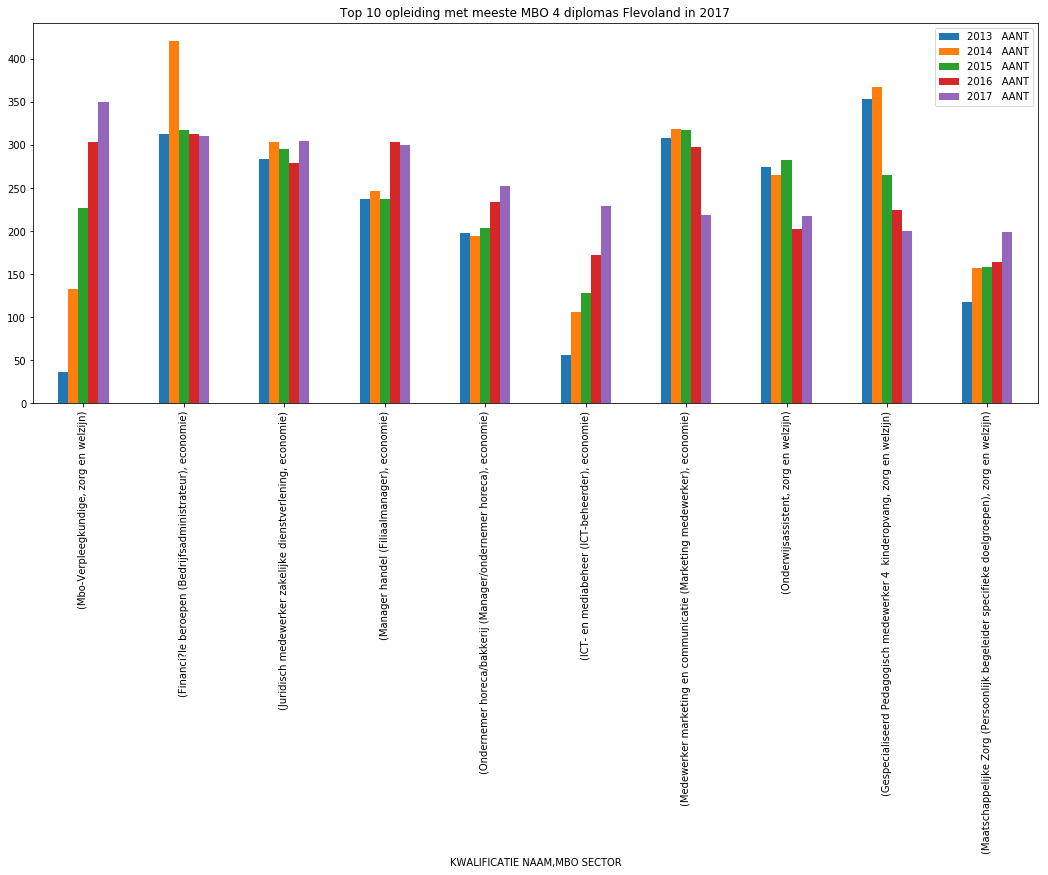

In [29]:
df_flevoland10.plot.bar(figsize=(18,7.0),title='Top 10 opleiding met meeste MBO 4 diplomas Flevoland in 2017')

# 5.2 Exploratie output tussen de gebieden landelijk, Zwolle en Flevoland

In [30]:
print(df_landelijk.shape)
df_landelijk.describe()

(425, 5)


,2013 AANT,2014 AANT,2015 AANT,2016 AANT,2017 AANT
count,425.000000,425.000000,425.000000,425.000000,425.000000
mean,143.724706,146.543529,149.912941,146.562353,159.611765
std,368.280703,388.305230,389.765077,404.609335,443.889873
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,0.000000,0.000000,0.000000
50%,20.000000,13.000000,8.000000,7.000000,4.000000
75%,90.000000,99.000000,98.000000,81.000000,93.000000
max,3205.000000,3096.000000,2660.000000,4191.000000,5064.000000


In [31]:
print(df_zwolle.shape)
df_zwolle.describe()

(325, 5)


,2013 AANT,2014 AANT,2015 AANT,2016 AANT,2017 AANT
count,325.000000,325.000000,325.000000,325.000000,325.000000
mean,28.566154,28.575385,29.110769,27.947692,30.778462
std,71.122999,69.405665,73.301087,76.260561,82.903075
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2.000000,2.000000,2.000000,1.000000
75%,19.000000,19.000000,21.000000,16.000000,20.000000
max,553.000000,496.000000,594.000000,804.000000,935.000000


In [32]:
print(df_flevoland.shape)
df_flevoland.describe()

(304, 5)


,2013 AANT,2014 AANT,2015 AANT,2016 AANT,2017 AANT
count,304.000000,304.000000,304.000000,304.000000,304.000000
mean,22.082237,23.131579,21.565789,21.812500,22.437500
std,52.569393,56.218713,51.060654,51.379206,52.634452
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2.000000,2.000000,2.000000,2.000000
75%,15.250000,16.000000,14.000000,14.000000,16.250000
max,354.000000,421.000000,318.000000,313.000000,350.000000


# JH - 1. Visualiseer waar de gediplomeerde mbo-4 woonachtig zijn naar mbo-opleiding in absolute aantallen

In [33]:
koppeltabel = pd.read_sql_query("SELECT * FROM koppeltabel",engine)

In [34]:
renamed = datasource.rename(columns={'PC4_LEERL': 'PC4'})
output = pd.merge(renamed, koppeltabel, on='PC4', how='inner')
output.head(10)

,nr,PC4,KWALIFICATIENIVEAU,KWALIFICATIE CODE,KWALIFICATIE NAAM,MBO SECTOR,DOMEIN,SECTORUNIT SBB,GESLACHT,2013 AANT,...,Locatie,Categorie,Woonplaatscode,Woonplaats,Gemeentecode,Gemeente,Provincie,Veiligheidsregio,Politie-eenheid,Omgevingsdienst
0,1424,1011,4,10388,Horeca-ondernemer/-manager,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",M,1,...,Flevoland,Aangrenzend Primair,3594,Amsterdam,363,Amsterdam,Noord-Holland,Amsterdam-Amstelland,Amsterdam,Noordzeekanaalgebied
1,1425,1011,4,10801,Restauratiemedewerker,techniek,Bouw en infra,Sectorunit techniek en gebouwde omgeving,M,1,...,Flevoland,Aangrenzend Primair,3594,Amsterdam,363,Amsterdam,Noord-Holland,Amsterdam-Amstelland,Amsterdam,Noordzeekanaalgebied
2,1426,1011,4,90038,Artiest (Muziek),techniek,Zorg en welzijn,Sectorunit creatieve industrie en ICT,M,0,...,Flevoland,Aangrenzend Primair,3594,Amsterdam,363,Amsterdam,Noord-Holland,Amsterdam-Amstelland,Amsterdam,Noordzeekanaalgebied
3,1427,1011,4,90290,Ondernemer detailhandel,economie,Handel en ondernemerschap,Sectorunit handel,M,1,...,Flevoland,Aangrenzend Primair,3594,Amsterdam,363,Amsterdam,Noord-Holland,Amsterdam-Amstelland,Amsterdam,Noordzeekanaalgebied
4,1428,1011,4,90301,Ondernemer horeca/bakkerij (Manager/ondernemer...,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",M,0,...,Flevoland,Aangrenzend Primair,3594,Amsterdam,363,Amsterdam,Noord-Holland,Amsterdam-Amstelland,Amsterdam,Noordzeekanaalgebied
5,1429,1011,4,90301,Ondernemer horeca/bakkerij (Manager/ondernemer...,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",V,0,...,Flevoland,Aangrenzend Primair,3594,Amsterdam,363,Amsterdam,Noord-Holland,Amsterdam-Amstelland,Amsterdam,Noordzeekanaalgebied
6,1430,1011,4,90303,Ondernemer horeca/bakkerij (Manager/ondernemer...,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",M,0,...,Flevoland,Aangrenzend Primair,3594,Amsterdam,363,Amsterdam,Noord-Holland,Amsterdam-Amstelland,Amsterdam,Noordzeekanaalgebied
7,1431,1011,4,90303,Ondernemer horeca/bakkerij (Manager/ondernemer...,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",V,1,...,Flevoland,Aangrenzend Primair,3594,Amsterdam,363,Amsterdam,Noord-Holland,Amsterdam-Amstelland,Amsterdam,Noordzeekanaalgebied
8,1432,1011,4,90411,Mediavormgever (Animatie/audiovisuele vormgeving),techniek,Media en vormgeving,Sectorunit creatieve industrie en ICT,M,0,...,Flevoland,Aangrenzend Primair,3594,Amsterdam,363,Amsterdam,Noord-Holland,Amsterdam-Amstelland,Amsterdam,Noordzeekanaalgebied
9,1433,1011,4,90412,Mediavormgever (Art & Design KC GOC),techniek,Media en vormgeving,Sectorunit creatieve industrie en ICT,V,1,...,Flevoland,Aangrenzend Primair,3594,Amsterdam,363,Amsterdam,Noord-Holland,Amsterdam-Amstelland,Amsterdam,Noordzeekanaalgebied


# JH - 1A. Visualisatie per Provincie

In [35]:
#dataframe om alle gediplomeerden per provincie te selecteren
df_totaalprovincie = output.groupby(['Provincie']).sum()[['2013   AANT','2014   AANT','2015   AANT','2016   AANT','2017   AANT']]
df_totaalprovincie

,2013 AANT,2014 AANT,2015 AANT,2016 AANT,2017 AANT
Provincie,,,,,
Drenthe,2160,2144,2266,2078,2497
Flevoland,1901,1809,1834,1768,1952
Friesland,3081,3100,3297,3207,3501
Gelderland,8350,8354,8471,8374,9259
Groningen,2209,2314,2507,2588,2998
Limburg,3995,4297,4217,3948,4671
Noord-Brabant,9538,9971,10286,10270,11357
Noord-Holland,9098,9491,9432,9144,9686
Overijssel,5353,5605,5681,5555,5804


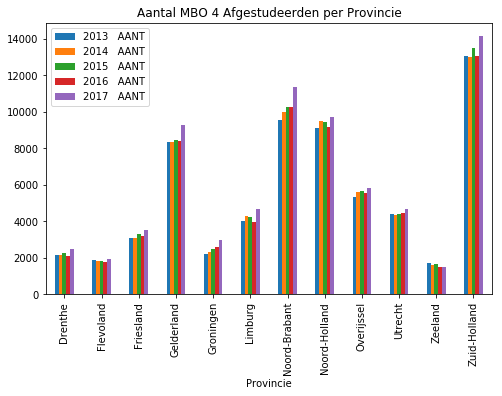

In [36]:
df_totaalprovincie.plot.bar(figsize=(8,5.0),title='Aantal MBO 4 Afgestudeerden per Provincie')

# JH - 1B. Visualisatie per Categorie

In [37]:
#dataframe om alle gediplomeerden per categorie te selecteren
df_totaalcategorie = output.groupby(['Categorie']).sum()[['2013   AANT','2014   AANT','2015   AANT','2016   AANT','2017   AANT']]
df_totaalcategorie

,2013 AANT,2014 AANT,2015 AANT,2016 AANT,2017 AANT
Categorie,,,,,
,47864,48768,50547,49320,54219
Aangrenzend Primair,8690,9018,8625,8602,8997
Aangrenzend Secundair,3159,3259,3330,3146,3631
Meerdere,1012,967,952,919,1027
Thuismarkt,4127,4055,4066,3975,4218


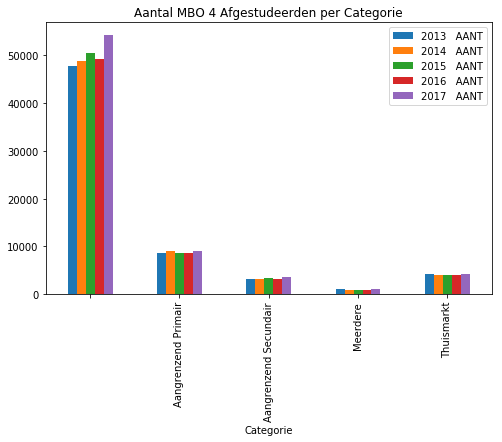

In [38]:
df_totaalcategorie.plot.bar(figsize=(8,5.0),title='Aantal MBO 4 Afgestudeerden per Categorie')

# JH - 1C. Visualisatie "Thuismarkt"

In [39]:
#dataframe om alle gediplomeerden in Categorie "Thuismarkt" te selecteren
df_thuismarkt = output.loc[output['Categorie'] == 'Thuismarkt']
df_gt = df_thuismarkt.groupby(['Gemeente']).sum()[['2013   AANT','2014   AANT','2015   AANT','2016   AANT','2017   AANT']]
df_gt

,2013 AANT,2014 AANT,2015 AANT,2016 AANT,2017 AANT
Gemeente,,,,,
Almere,954,936,896,854,982
Dalfsen,39,38,34,37,24
De Wolden,60,57,53,55,64
Dronten,187,174,215,207,228
Elburg,90,94,92,95,113
Epe,115,134,110,115,139
Groningen,9,7,5,8,7
Hattem,44,44,46,37,45
Heerde,102,108,94,103,109


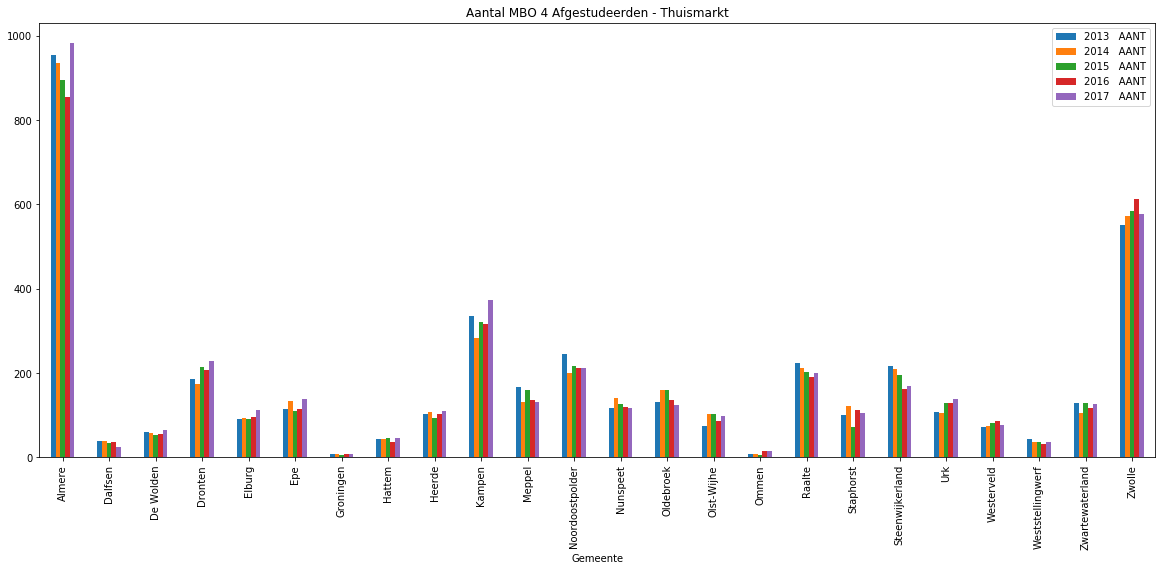

In [40]:
df_gt.plot.bar(figsize=(20,8.0),title='Aantal MBO 4 Afgestudeerden - Thuismarkt')

# JH - 1D. Visualisatie "Aangrenzend Primair"

In [41]:
#dataframe om alle gediplomeerden in Categorie "Aangrenzend Primair" te selecteren
df_ap = output.loc[output['Categorie'] == 'Aangrenzend Primair']
df_gap = df_ap.groupby(['Gemeente']).sum()[['2013   AANT','2014   AANT','2015   AANT','2016   AANT','2017   AANT']]
df_gap

,2013 AANT,2014 AANT,2015 AANT,2016 AANT,2017 AANT
Gemeente,,,,,
Aalsmeer,103,113,113,104,112
Alkmaar,22,27,34,22,26
Amersfoort,580,600,578,617,590
Amsterdam,2106,2316,2081,2203,2081
Apeldoorn,581,612,637,604,648
Baarn,86,77,63,59,76
Barneveld,317,306,258,310,272
Beemster,50,30,38,43,36
Blaricum,20,21,17,15,26


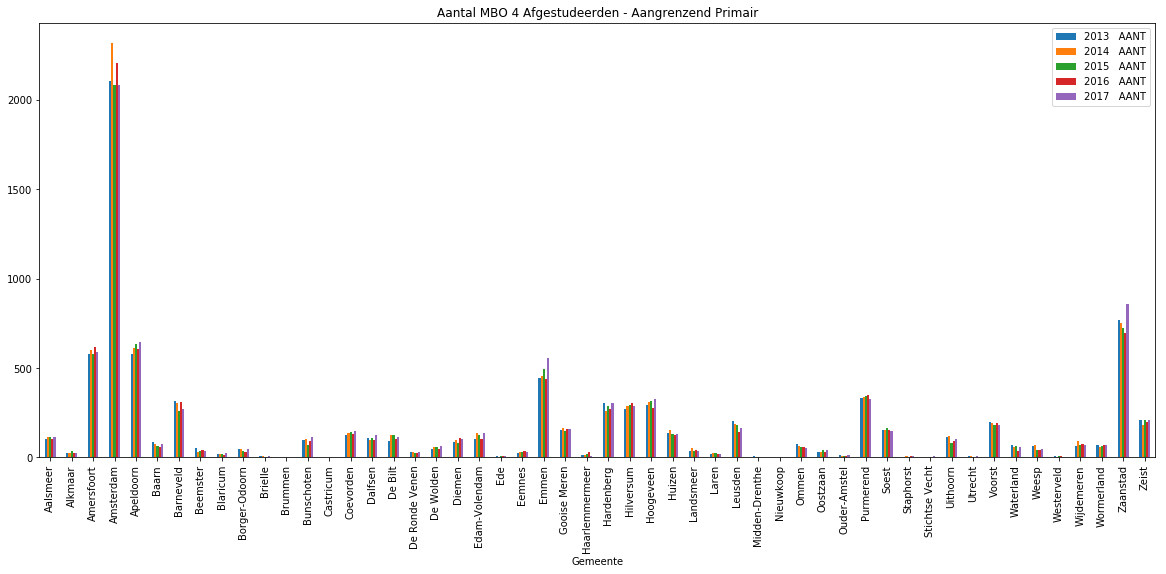

In [42]:
df_gap.plot.bar(figsize=(20,8.0),title='Aantal MBO 4 Afgestudeerden - Aangrenzend Primair')

# JH - 1E. Visualisatie "Aangrenzend Secundair"

In [43]:
#dataframe om alle gediplomeerden in Categorie "Aangrenzend Secundair" te selecteren
df_as = output.loc[output['Categorie'] == 'Aangrenzend Secundair']
df_gas = df_as.groupby(['Gemeente']).sum()[['2013   AANT','2014   AANT','2015   AANT','2016   AANT','2017   AANT']]
df_gas

,2013 AANT,2014 AANT,2015 AANT,2016 AANT,2017 AANT
Gemeente,,,,,
Aa en Hunze,74,55,71,68,80
Almelo,272,334,323,312,329
Assen,333,280,291,335,382
Borne,109,144,116,107,120
De Fryske Marren,32,35,16,21,41
Deventer,364,373,407,382,375
Dinkelland,39,40,34,48,38
Haaksbergen,115,84,121,113,134
Hardenberg,53,62,68,51,69


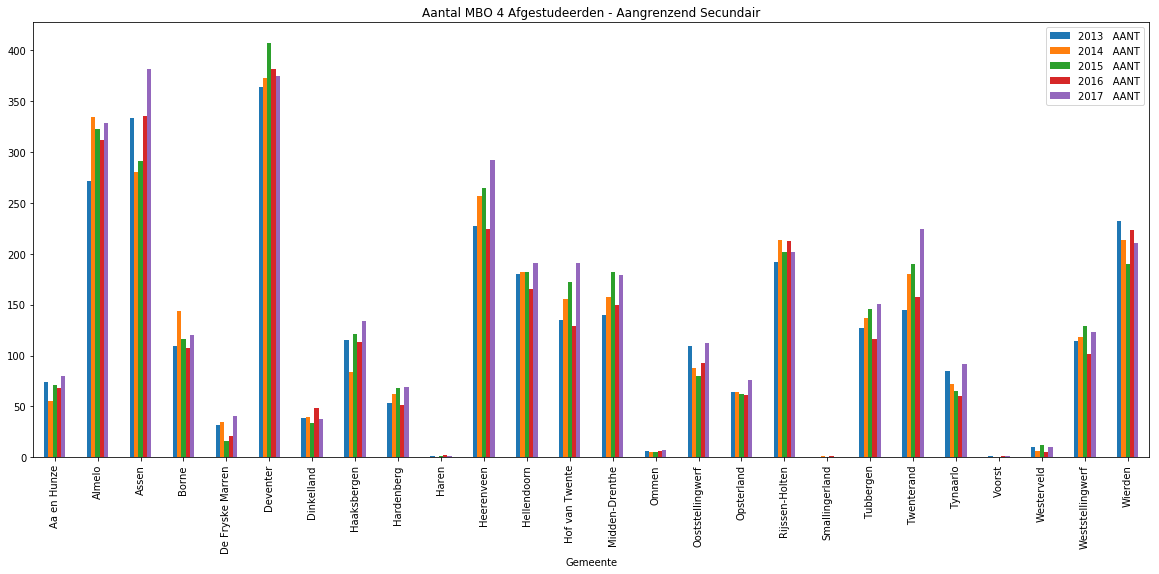

In [44]:
df_gas.plot.bar(figsize=(20,8.0),title='Aantal MBO 4 Afgestudeerden - Aangrenzend Secundair')

# JH - 1F. Visualisatie "Meerdere"

In [45]:
#dataframe om alle gediplomeerden in Categorie "Meerdere" te selecteren
df_me = output.loc[output['Categorie'] == 'Meerdere']
df_gme = df_me.groupby(['Gemeente']).sum()[['2013   AANT','2014   AANT','2015   AANT','2016   AANT','2017   AANT']]
df_me

,nr,PC4,KWALIFICATIENIVEAU,KWALIFICATIE CODE,KWALIFICATIE NAAM,MBO SECTOR,DOMEIN,SECTORUNIT SBB,GESLACHT,2013 AANT,...,Locatie,Categorie,Woonplaatscode,Woonplaats,Gemeentecode,Gemeente,Provincie,Veiligheidsregio,Politie-eenheid,Omgevingsdienst
70225,154745,3841,4,10237,Middenkaderf. Elektrotechnische Install. techn...,techniek,Techniek en procesindustrie,Sectorunit techniek en gebouwde omgeving,M,1,...,Zwolle,Meerdere,3222,Harderwijk,243,Harderwijk,Gelderland,Noord- en Oost-Gelderland,Oost-Nederland,Noord-Veluwe
70226,154746,3841,4,10746,Sociaal Cultureel Werker (SCW),zorg en welzijn,Zorg en welzijn,"Sectorunit zorg, welzijn en sport",M,1,...,Zwolle,Meerdere,3222,Harderwijk,243,Harderwijk,Gelderland,Noord- en Oost-Gelderland,Oost-Nederland,Noord-Veluwe
70227,154747,3841,4,10761,Commercieel Medewerker Bank- en Verzekeringswezen,economie,Economie en administratie,Sectorunit zakelijke dienstverlening en veilig...,M,1,...,Zwolle,Meerdere,3222,Harderwijk,243,Harderwijk,Gelderland,Noord- en Oost-Gelderland,Oost-Nederland,Noord-Veluwe
70228,154748,3841,4,25160,Leidinggevende team/afdeling/project,economie,Handel en ondernemerschap,Bovensectoraal,M,0,...,Zwolle,Meerdere,3222,Harderwijk,243,Harderwijk,Gelderland,Noord- en Oost-Gelderland,Oost-Nederland,Noord-Veluwe
70229,154749,3841,4,25420,Ondernemer vers,economie,"Voedsel, natuur en leefomgeving","Sectorunit voedsel, groen en gastvrijheid",V,0,...,Zwolle,Meerdere,3222,Harderwijk,243,Harderwijk,Gelderland,Noord- en Oost-Gelderland,Oost-Nederland,Noord-Veluwe
70230,154750,3841,4,90031,Artiest (Dans),techniek,Zorg en welzijn,Sectorunit creatieve industrie en ICT,M,0,...,Zwolle,Meerdere,3222,Harderwijk,243,Harderwijk,Gelderland,Noord- en Oost-Gelderland,Oost-Nederland,Noord-Veluwe
70231,154751,3841,4,90031,Artiest (Dans),techniek,Zorg en welzijn,Sectorunit creatieve industrie en ICT,V,0,...,Zwolle,Meerdere,3222,Harderwijk,243,Harderwijk,Gelderland,Noord- en Oost-Gelderland,Oost-Nederland,Noord-Veluwe
70232,154752,3841,4,90037,Artiest (Muziek uitvoerend),techniek,Zorg en welzijn,Sectorunit creatieve industrie en ICT,M,1,...,Zwolle,Meerdere,3222,Harderwijk,243,Harderwijk,Gelderland,Noord- en Oost-Gelderland,Oost-Nederland,Noord-Veluwe
70233,154753,3841,4,90038,Artiest (Muziek),techniek,Zorg en welzijn,Sectorunit creatieve industrie en ICT,M,0,...,Zwolle,Meerdere,3222,Harderwijk,243,Harderwijk,Gelderland,Noord- en Oost-Gelderland,Oost-Nederland,Noord-Veluwe
70234,154754,3841,4,90217,Logistiek supervisor (Logistiek supervisor VTL),techniek,"Transport, scheepvaart en logistiek","Sectorunit mobiliteit, transport, logistiek, m...",V,0,...,Zwolle,Meerdere,3222,Harderwijk,243,Harderwijk,Gelderland,Noord- en Oost-Gelderland,Oost-Nederland,Noord-Veluwe


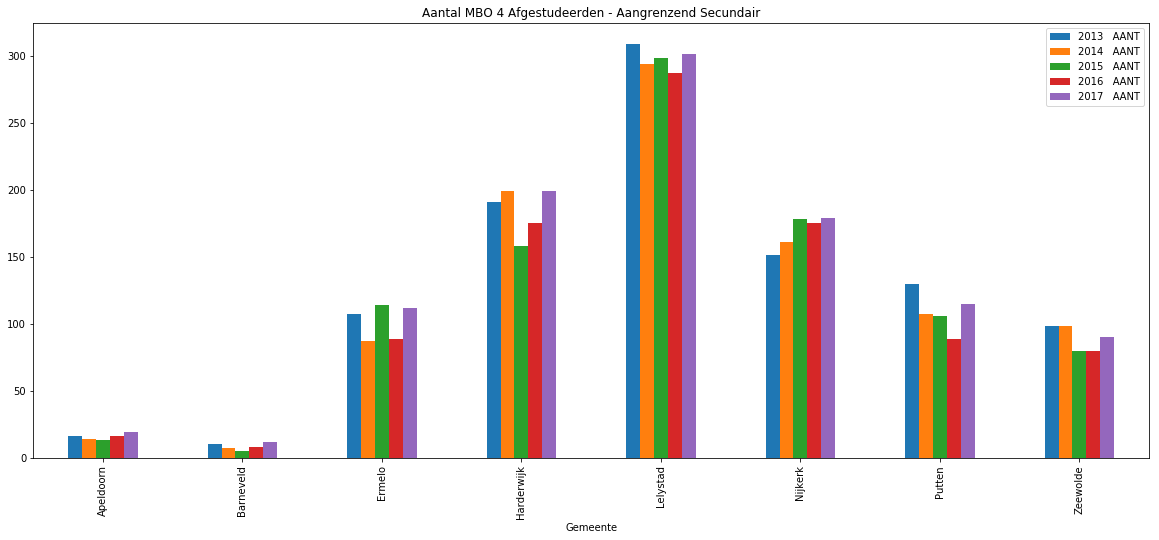

In [46]:
df_gme.plot.bar(figsize=(20,8.0),title='Aantal MBO 4 Afgestudeerden - Aangrenzend Secundair')

# 2. Visualisatie "MBO Sector" in absolute aantallen

In [47]:
df_sector = df.groupby(['MBO SECTOR']).sum()[['2013   AANT','2014   AANT','2015   AANT','2016   AANT','2017   AANT']]
df_sector

,2013 AANT,2014 AANT,2015 AANT,2016 AANT,2017 AANT
MBO SECTOR,,,,,
combinatie van sectoren,4,2,0,0,0
economie,21757,22626,22828,22941,24777
groen,2658,2703,2987,2761,4167
techniek,14563,14782,15488,15668,16847
zorg en welzijn,22101,22168,22410,20919,22044


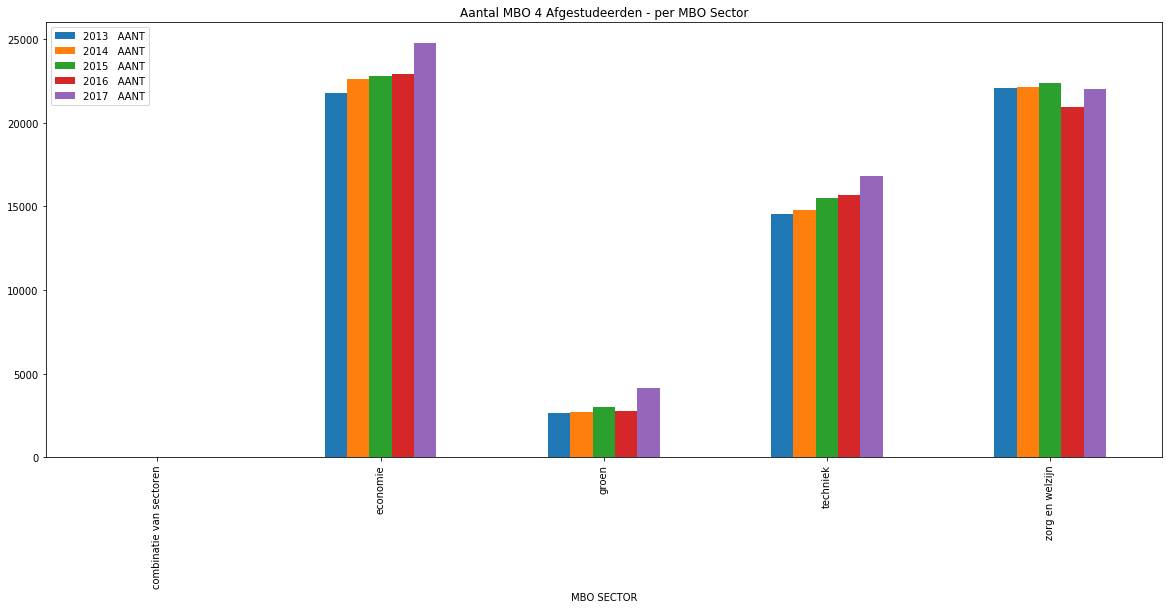

In [48]:
df_sector.plot.bar(figsize=(20,8.0),title='Aantal MBO 4 Afgestudeerden - per MBO Sector')

In [49]:
#output_notebook()

#Kolommen zijn de kolommen uit de df_totaalSBB dataframe. Dit gaat dan om 2013 AANT etc. Dit is voor de eerste groepering. 
kolommen = list(df_totaalSBB)

#Sectoren haalt alle unieke waardes uit het dataframe voor de kolom SECTORUNIT SBB.
sectoren = list(df['SECTORUNIT SBB'].unique())

#Voeg per kolom alle sectoren toe. Dit wordt dan de data voor de x-as. 
#Kolom is bijvoorbeeld 2013 AANT en hier worden vervolgens alle sectoren aan toegevoegd.
x = [ (kolom, sector) for kolom in kolommen for sector in sectoren ]

#Data voor de y-as
#Data doorlopen om de totalen op de juiste volgorde in een array te plaatsen.
#Zelfde volgorde zoals hierboven staat voor de gegevens voor de x-as

counts = []

for kolom in kolommen:
    for sector in sectoren:
        counts.append(df_totaalSBB.loc[sector][kolom])
        
#Teken grafiek
source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x), plot_height=400, title="Totalen per SBB sector per jaar")

p.vbar(x='x', top='counts', width=0.8, source=source)

p.width=900
p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None

show(p)

In [50]:
#Kolommen zijn de kolommen uit de df_totaalSBB dataframe. Dit gaat dan om 2013 AANT etc. Dit is voor de eerste groepering. 
kolommen_zwolle = list(df_aantal_zwolle)

#Sectoren haalt alle unieke waardes uit het dataframe voor de kolom SECTORUNIT SBB.
locaties_zwolle = list(df_locatie_zwolle['Locatie'].unique())

#Voeg per kolom alle sectoren toe. Dit wordt dan de data voor de x-as. 
#Kolom is bijvoorbeeld 2013 AANT en hier worden vervolgens alle sectoren aan toegevoegd.
x = [ (kolom, locatie) for kolom in kolommen_zwolle for locatie in locaties_zwolle ]

#Data voor de y-as
#Data doorlopen om de totalen op de juiste volgorde in een array te plaatsen.
#Zelfde volgorde zoals hierboven staat voor de gegevens voor de x-as

counts = []

for kolom in kolommen_zwolle:
    for locatie in locaties_zwolle:
        counts.append(df_aantal_zwolle.loc[locatie][kolom])

#Teken grafiek
source = ColumnDataSource(data=dict(x=x, counts=counts))

az = figure(x_range=FactorRange(*x), plot_height=400, title="Aantal MBO Afgestudeerden Regio Zwolle")

az.vbar(x='x', top='counts', width=0.8, source=source)

az.width=900
az.y_range.start = 0
az.x_range.range_padding = 0.1
az.xaxis.major_label_orientation = 1
az.xgrid.grid_line_color = None


#update functie om nieuwe data(selecties) weer te geven, doet nu niets...
#def update():

#callback om updates elke 100ms op te halen
#doc.add_periodic_callback(update, 100)

show(az)

In [51]:
#from bokeh.palettes import Spectral6

#Kolommen zijn de kolommen uit de df_totaalSBB dataframe. Dit gaat dan om 2013 AANT etc. Dit is voor de eerste groepering. 
#kolommen = list(df_totaalSBB)

#Sectoren haalt alle unieke waardes uit het dataframe voor de kolom SECTORUNIT SBB.
#sectoren = df['SECTORUNIT SBB'].unique()
#sectorenMultiplied = []

#Voeg per kolom alle sectoren toe. Dit wordt dan de data voor de x-as. 
#Kolom is bijvoorbeeld 2013 AANT en hier worden vervolgens alle sectoren aan toegevoegd.
#x = [ (sector, kolom) for sector in sectoren for kolom in kolommen ]

#Data voor de y-as
#Data doorlopen om de totalen op de juiste volgorde in een array te plaatsen.
#Zelfde volgorde zoals hierboven staat voor de gegevens voor de x-as

#counts = []

#for sector in sectoren:
#    for kolom in kolommen:
#        counts.append(df_totaalSBB.loc[sector][kolom])

#cyl_cmap = factor_cmap('cyl', palette=Spectral5, factors=sorted(df.cyl.unique())
#Teken grafiek
#source = ColumnDataSource(data=dict(x=x, counts=counts, sectoren=sectorenMultiplied, color=Spectral6))
#p = figure(x_range=FactorRange(*x), plot_height=400, title="Totalen per SBB sector per jaar")
#p.vbar(x='x', top='counts', width=0.8, legend='sectoren', color='color', source=source)

#p.width=1000
#p.y_range.start = 0
#p.x_range.range_padding = 0.1
#p.xaxis.major_label_orientation = 'vertical'
#p.xgrid.grid_line_color = None

#p.legend.orientation = "horizontal"
#p.legend.location = "top_center"

#p.xaxis[0].group_text_font_size = '0pt'
#show(p)

In [52]:
# voorbeeld data, laad in om werking te zien! Wel even de volgende paragraaf skippen...

import random

def make_document(doc):
    source = ColumnDataSource({'x': [], 'y': [], 'color': []})

    def update():
        new = {'x': [random.random()],
               'y': [random.random()],
               'color': [random.choice(['red', 'blue', 'green'])]}
        source.stream(new)

    doc.add_periodic_callback(update, 100)

    fig = figure(title='Streaming Circle Plot!', sizing_mode='scale_width',
                 x_range=[0, 1], y_range=[0, 1])
    fig.circle(source=source, x='x', y='y', color='color', size=10)

    doc.title = "Now with live updating!"
    doc.add_root(fig)

In [53]:
# maak document, met daarin grafiek. Hier zullen (uiteindelijk) meerdere grafieken moeten worden 
# weergegeven met meerdere opties.

def make_document(doc):
    #Kolommen zijn de kolommen uit de df_totaalSBB dataframe. Dit gaat dan om 2013 AANT etc. Dit is voor de eerste groepering. 
    kolommen = list(df_totaalSBB)

    #Sectoren haalt alle unieke waardes uit het dataframe voor de kolom SECTORUNIT SBB.
    sectoren = list(df['SECTORUNIT SBB'].unique())

    #Voeg per kolom alle sectoren toe. Dit wordt dan de data voor de x-as. 
    #Kolom is bijvoorbeeld 2013 AANT en hier worden vervolgens alle sectoren aan toegevoegd.
    x = [ (kolom, sector) for kolom in kolommen for sector in sectoren ]

    #Data voor de y-as
    #Data doorlopen om de totalen op de juiste volgorde in een array te plaatsen.
    #Zelfde volgorde zoals hierboven staat voor de gegevens voor de x-as

    counts = []

    for kolom in kolommen:
        for sector in sectoren:
            counts.append(df_totaalSBB.loc[sector][kolom])

    #Teken grafiek
    source = ColumnDataSource(data=dict(x=x, counts=counts))

    p = figure(x_range=FactorRange(*x), plot_height=400, title="Totalen per SBB sector per jaar")

    p.vbar(x='x', top='counts', width=0.8, source=source)

    p.width=900
    p.y_range.start = 0
    p.x_range.range_padding = 0.1
    p.xaxis.major_label_orientation = 1
    p.xgrid.grid_line_color = None


    #update functie om nieuwe data(selecties) weer te geven
    def updateSBB(attr, old, new):
        kolommen = [jaren.labels[i] for i in jaren.active]
        x = [ (kolom, sector) for kolom in kolommen for sector in sectoren ]

        counts = []

        for kolom in kolommen:
            for sector in sectoren:
                counts.append(df_totaalSBB.loc[sector][kolom])

        newSource = ColumnDataSource(data=dict(x=x, counts=counts))
        source.data.update(newSource.data)
    
    
    jaren = CheckboxGroup(labels=kolommen, active = [0, 1, 2, 3 ,4])
    jaren.on_change('active', updateSBB)

    layout = row(p, jaren)

    #callback om updates elke 100ms op te halen
    #doc.add_periodic_callback(update, 100)

    doc.title = "Sectorunit SBB chart..."
    doc.add_root(layout)

    # maak document, met daarin grafiek. Hier zullen (uiteindelijk) meerdere grafieken moeten worden 
    # weergegeven met meerdere opties.

    #def aantal_zwolle(doc):

        #Kolommen zijn de kolommen uit de df_totaalSBB dataframe. Dit gaat dan om 2013 AANT etc. Dit is voor de eerste groepering. 
        #kolommen_zwolle = list(df_aantal_zwolle)

        #Sectoren haalt alle unieke waardes uit het dataframe voor de kolom SECTORUNIT SBB.
        #locaties_zwolle = list(df_aantal_zwolle['Locatie'].unique())

        #Voeg per kolom alle sectoren toe. Dit wordt dan de data voor de x-as. 
        #Kolom is bijvoorbeeld 2013 AANT en hier worden vervolgens alle sectoren aan toegevoegd.
        #x = [ (kolom, locatie) for kolom in kolommen_zwolle for locatie in locaties_zwolle ]

        #Data voor de y-as
        #Data doorlopen om de totalen op de juiste volgorde in een array te plaatsen.
        #Zelfde volgorde zoals hierboven staat voor de gegevens voor de x-as

        #counts = []

        #for kolom in kolommen_zwolle:
        #   for locatie in locaties_zwolle:
        #        counts.append(df_aantal_zwolle.loc[sector][kolom])

        #Teken grafiek
        #source = ColumnDataSource(data=dict(x=x, counts=counts))

        #az = figure(x_range=FactorRange(*x), plot_height=400, title="Aantal MBO Afgestudeerden Regio Zwolle")

        #az.vbar(x='x', top='counts', width=0.8, source=source)

        #az.width=900
        #az.y_range.start = 0
        #az.x_range.range_padding = 0.1
        #az.xaxis.major_label_orientation = 1
        #az.xgrid.grid_line_color = None
   

        #update functie om nieuwe data(selecties) weer te geven, doet nu niets...
        #def update():

        #callback om updates elke 100ms op te halen
        #doc.add_periodic_callback(update, 100)
        
        
        #doc.title = "Tekst..."
        #doc.add_root(az)

In [54]:
# starten van de webserver :)
apps = {'/': Application(FunctionHandler(make_document))}

server = Server(apps, port=5006, allow_websocket_origin=['localhost:5006','nm-interactive.net:5006'])
server.start()

In [55]:
# stoppen van de server :)
server.stop()

In [56]:
output_notebook()

#Kolommen zijn de kolommen uit de df_totaalSBB dataframe. Dit gaat dan om 2013 AANT etc. Dit is voor de eerste groepering. 
kolommen = list(df_totaalSBB)

#Sectoren haalt alle unieke waardes uit het dataframe voor de kolom SECTORUNIT SBB.
sectoren = df['SECTORUNIT SBB'].unique()

#Voeg per kolom alle sectoren toe. Dit wordt dan de data voor de x-as. 
#Kolom is bijvoorbeeld 2013 AANT en hier worden vervolgens alle sectoren aan toegevoegd.
x = [ (kolom, sector) for kolom in kolommen for sector in sectoren ]

#Data voor de y-as
#Data doorlopen om de totalen op de juiste volgorde in een array te plaatsen.
#Zelfde volgorde zoals hierboven staat voor de gegevens voor de x-as

counts = []

for kolom in kolommen:
    for sector in sectoren:
        counts.append(df_totaalSBB.loc[sector][kolom])
        

source = ColumnDataSource(data=dict(x=x, counts=counts))

#Teken grafiek
p = figure(x_range=FactorRange(*x), plot_height=400, title="Totalen per SBB sector per jaar")

p.vbar(x='x', top='counts', width=0.8, source=source)

p.width=900
p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None

show(p)

Loading BokehJS ...

In [57]:
def updateSBB(attr, old, new):
    kolommen = [jaren.labels[i] for i in jaren.active]
    x = [ (kolom, sector) for kolom in kolommen for sector in sectoren ]
   
    counts = []
    
    for kolom in kolommen:
        for sector in sectoren:
            counts.append(df_totaalSBB.loc[sector][kolom])
    
    newSource = ColumnDataSource(data=dict(x=x, counts=counts))
    source.data.update(newSource.data)

In [58]:
output_file("slider.html")
jaren = CheckboxGroup(labels=kolommen, active = [0, 1, 2, 3 ,4])
jaren.on_change('active', updateSBB)

p1 = figure(plot_width=300, plot_height=300)
p1.circle([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], size=20, color="red", alpha=0.5)

testcheckbox = CheckboxGroup(labels=list("Test"), active = [0, 1])
                             
layout = row(p, jaren)
tab1 = Panel(child=layout, title="Aantal per SBB Sectorunit")

p2 = figure(plot_width=300, plot_height=300)
p2.line([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], line_width=3, color="red", alpha=0.5)

l2 = row(az)
tab2 = Panel(child=l2, title="Aantal MBO 4 afgestudeerden Zwolle")

tabs = Tabs(tabs=[ tab1, tab2 ])

show(tabs)

In [59]:
def test():
    print("test")

In [60]:
test()

test
